In [19]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
print(torch.__version__)

In [2]:
print(torch.cuda.is_available())

False


In [10]:
import urllib.request

In [12]:
url="https://github.com/Joseph-Morris/Deep-Learning/blob/main/German-Shepherd-on-White-00.jpg?raw=true"

In [13]:
file_name = "dog.jpg"

In [14]:
urllib.request.urlretrieve(url, file_name)

('dog.jpg', <http.client.HTTPMessage at 0x1da3bbed5e0>)

In [15]:
import matplotlib.pyplot as plt
from PIL import Image

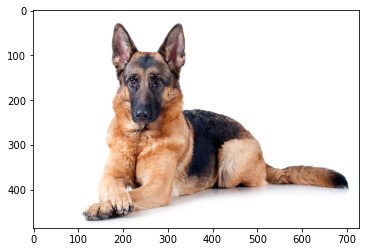

In [16]:
img = Image.open("dog.jpg")
plt.imshow(img)

In [20]:
from torchvision import transforms

In [21]:
preprocess = transforms.Compose([
                                 transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize(
                                     mean = [0.485, 0.456, 0.406],
                                     std = [0.229, 0.224, 0.225]
                                 )
])

In [22]:
img_tensor = preprocess(img)

In [23]:
img_tensor.shape

torch.Size([3, 224, 224])

In [24]:
batch = img_tensor.unsqueeze(0)

In [25]:
batch.shape

torch.Size([1, 3, 224, 224])

In [26]:
from torchvision import models

In [27]:
model = models.alexnet(pretrained = True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\morri/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [29]:
model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [30]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [31]:
y = model(batch.to(device))

In [32]:
y.shape

torch.Size([1, 1000])

In [33]:
y_max, index = torch.max(y,1)
print(index, y_max)

tensor([225]) tensor([25.9716], grad_fn=<MaxBackward0>)


In [34]:
url = "http://pytorch.tips/imagenet-labels"

In [35]:
fname = "imagenet_class_labels.txt"

In [36]:
urllib.request.urlretrieve(url, fname)

('imagenet_class_labels.txt', <http.client.HTTPMessage at 0x1da43a6df10>)

In [37]:
with open("imagenet_class_labels.txt") as f:
  classes = [line.strip() for line in f.readlines()]

In [38]:
print(classes[258])

258: 'Samoyed, Samoyede',


In [39]:
prob = torch.nn.functional.softmax(y, dim=1)[0]*100

In [40]:
print(classes[index[0]],
      prob[index[0]].item())

225: 'malinois', 59.637088775634766


In [41]:
_, indeces = torch.sort(y, descending=True)

In [42]:
for idx in indeces[0][:5]:
  print(classes[idx], prob[idx].item())

225: 'malinois', 59.637088775634766
235: 'German shepherd, German shepherd dog, German police dog, alsatian', 40.07558059692383
246: 'Great Dane', 0.16354498267173767
184: 'Irish terrier', 0.05604846030473709
182: 'Border terrier', 0.020665613934397697
